In [596]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy
import re
import math
from pylab import rcParams
rcParams['figure.figsize'] =14, 6
%matplotlib inline

In [597]:
#Extracting data from file
dataset = 2 #dataset number
trajectory_path = "C:/users/ME/documents/DBSCAN_with_datasets/%d/map/%d_TRAJECTORY.csv" %(dataset, dataset)
#car_path = "C:/users/ME/documents/DBSCAN_with_datasets/%d/CAR_POINTS/RAW_CAR_POINTS/CAR_POINTS.csv" %dataset
car_path = "C:/users/ME/documents/DBSCAN_with_datasets/%d/CAR_POINTS/RAW_CAR_POINTS/%d_CAR_POINTS.csv" %(dataset, dataset)
                                                                                                         
trajectory = pd.read_csv(trajectory_path, sep=',', header=None)
car = pd.read_csv(car_path, sep=',', header=None)

trajectory = trajectory.drop([1], axis=1)
trajectory.head()

# car = car.drop([0], axis=1)
car = car.drop([1], axis=1)
car.head()

,0,2
0,0.280054,5.951190
1,0.546161,4.006920
2,0.619941,4.651570
3,0.830069,3.343010
4,0.639142,0.842494


In [598]:
#dividing road into left and right

#setting trajectory
trajectory_x = trajectory[0]
trajectory_x = trajectory_x.values.astype('float32', copy=False)

trajectory_y = trajectory[2]
trajectory_y = trajectory_y.values.astype('float32', copy=False)

# car_x = car[1]
car_x = car[0]
car_x = car_x.values.astype('float32', copy=False)

car_y = car[2]
car_y = car_y.values.astype('float32', copy=False)
#stopping at 50m
trajectory_x_plot = []
trajectory_x_plot = [0 for i in range(len(trajectory_x))]  
trajectory_y_plot = []
trajectory_y_plot = [0 for i in range(len(trajectory_y))]

car_x_plot = []
car_x_plot = [0 for i in range(len(car_x))]  
car_y_plot = []
car_y_plot = [0 for i in range(len(car_y))]

In [599]:
for a in range(len(trajectory_y)):
    if trajectory_y[a] < 50.0:
        trajectory_x_plot[a] = trajectory_x[a]
        trajectory_y_plot[a] = trajectory_y[a]
        #print(trajectory_x_plot[a], "    ", trajectory_y_plot[a])
        
for a in range(len(car_y)):
    if car_y[a] < 50.0:
        car_x_plot[a] = car_x[a]
        car_y_plot[a] = car_y[a]
        #print(trajectory_x_plot[a], "    ", trajectory_y_plot[a])

In [600]:
#extracting left and right side  car data
car_x_pos = []
car_x_pos = [0 for i in range(100*len(car_x))]  
car_y_pos = []
car_y_pos = [0 for i in range(100*len(car_x))] 

car_x_neg = []
car_x_neg = [0 for i in range(100*len(car_y))]  
car_y_neg = []
car_y_neg = [0 for i in range(100*len(car_y))] 


c = 1.0
max = 50.0
i = 0

while c <= max:
    #sum of trajectory_x_plot having trajectory_y_plot <= 1
    summ = 0.0
    count = 0
    for a in range(len(trajectory_y_plot)):
        if trajectory_y_plot[a] > c-1.0 and trajectory_y_plot[a] <= c:
            summ = summ + trajectory_x_plot[a]
            count = count + 1
    average = summ / count
    average = round(average,3)
    #print(average)
    
    
    for b in range(len(car_y)):
        if car_y[b] > c-1.0 and car_y[b] <= c:
            if car_x[b] > average:
                car_x_pos[i] = car_x[b]
                car_y_pos[i] = car_y[b]
                #i = i + 1
            if car_x[b] < average:
                car_x_neg[i] = car_x[b]
                car_y_neg[i] = car_y[b]

            i = i + 1
        #print(i)
    c = c + 1.0
#removing zeros from the array
car_x_neg = [i for i in car_x_neg if i != 0]
print(len(car_x_neg))
car_y_neg = [i for i in car_y_neg if i != 0]
print(len(car_y_neg))

car_x_pos = [i for i in car_x_pos if i != 0]
print(len(car_x_pos))
car_y_pos = [i for i in car_y_pos if i != 0]
print(len(car_y_pos))


387
387
1836
1836


In [601]:
#ranges for dataset = 1
if dataset == 1:
    for a in range(len(car_y_pos)):
        if car_y_pos[a] > 3.5 and car_y_pos[a] < 4.5 or car_y_pos[a] > 7.5 and car_y_pos[a] < 8.5 or car_y_pos[a] > 11.0 and car_y_pos[a] < 12.0:
            car_x_pos[a] = 0.0
            car_y_pos[a] = 0.0
        if car_y_pos[a] > 15.0 and car_y_pos[a] < 16.0 or car_y_pos[a] > 18.5 and car_y_pos[a] < 19.0 or car_y_pos[a] > 22.0 and car_y_pos[a] < 26.0 or car_y_pos[a] > 30.0 and car_y_pos[a] < 34.0:
            car_x_pos[a] = 0.0
            car_y_pos[a] = 0.0
        if car_y_pos[a] > 37.0 and car_y_pos[a] < 38.0 or car_y_pos[a] > 41.0 and car_y_pos[a] < 42.0 or car_y_pos[a] > 46.0 and car_y_pos[a] < 47.0:
            car_x_pos[a] = 0.0
            car_y_pos[a] = 0.0
            
    for a in range(len(car_y_neg)):
        if car_y_neg[a] > 12.5 and car_y_neg[a] < 14.5 or car_y_neg[a] > 18.0 and car_y_neg[a] < 41.0 or car_y_neg[a] > 43.0 and car_y_neg[a] < 46.0:
            car_x_neg[a] = 0.0
            car_y_neg[a] = 0.0

In [602]:
#ranges for dataset = 2
if dataset == 2:
    for a in range(len(car_y_pos)):
        if car_y_pos[a] > 20.0 and car_y_pos[a] < 25.0:
            if car_x_pos[a] > 0.0 and car_x_pos[a] < 2.0:
                car_x_pos[a] = 0.0
                car_y_pos[a] = 0.0
        if car_y_pos[a] > 0.0 and car_y_pos[a] < 2.0 or car_y_pos[a] > 6.0 and car_y_pos[a] < 20.0 or car_y_pos[a] > 25.0 and car_y_pos[a] < 26.5 or car_y_pos[a] > 30.0 and car_y_pos[a] < 31.0:
            car_x_pos[a] = 0.0
            car_y_pos[a] = 0.0
        if car_y_pos[a] > 34.5 and car_y_pos[a] < 35.5 or car_y_pos[a] > 40.0 and car_y_pos[a] < 41.0 or car_y_pos[a] > 46.0 and car_y_pos[a] < 47.0:
            car_x_pos[a] = 0.0
            car_y_pos[a] = 0.0

    for a in range(len(car_y_neg)):
        if car_y_neg[a] > 21.0 and car_y_neg[a] < 31.0:
            car_x_neg[a] = 0.0
            car_y_neg[a] = 0.0

In [603]:
#ranges for dataset = 3
if dataset == 3:
    for a in range(len(car_y_pos)):
        if car_y_pos[a] > 0.0 and car_y_pos[a] < 2.0 or car_y_pos[a] > 9.5 and car_y_pos[a] < 10.5 or car_y_pos[a] > 17.0 and car_y_pos[a] < 19.0 or car_y_pos[a] > 22.0 and car_y_pos[a] < 23.0 or car_y_pos[a] > 30.0 and car_y_pos[a] < 31.0:
            car_x_pos[a] = 0.0
            car_y_pos[a] = 0.0
        if car_y_pos[a] > 35.0 and car_y_pos[a] < 36.0 or car_y_pos[a] > 40.0 and car_y_pos[a] < 41.0 or car_y_pos[a] > 46.0 and car_y_pos[a] < 47.0:
            car_x_pos[a] = 0.0
            car_y_pos[a] = 0.0

    for a in range(len(car_y_neg)):
        if car_y_neg[a] > 11.0 and car_y_neg[a] < 15.0 or car_y_neg[a] > 19.0 and car_y_neg[a] < 20.0 or car_y_neg[a] > 49.0 and car_y_neg[a] < 49.5:
            car_x_neg[a] = 0.0
            car_y_neg[a] = 0.0

In [604]:
#ranges for dataset = 5
if dataset == 5:
    for a in range(len(car_y_pos)):
        if car_y_pos[a] > 4.0 and car_y_pos[a] < 6.0 or car_y_pos[a] > 21.5 and car_y_pos[a] < 24.5 or car_y_pos[a] > 12.0 and car_y_pos[a] < 13.0 or car_y_pos[a] > 9.0 and car_y_pos[a] < 10.0:
            car_x_pos[a] = 0.0
            car_y_pos[a] = 0.0
        if car_y_pos[a] > 16.0 and car_y_pos[a] < 17.0 or car_y_pos[a] > 28.0 and car_y_pos[a] < 31.0 or car_y_pos[a] > 36.0 and car_y_pos[a] < 37.0 or car_y_pos[a] > 45.5 and car_y_pos[a] < 46.5:
            car_x_pos[a] = 0.0
            car_y_pos[a] = 0.0

    for a in range(len(car_y_neg)):
        if car_y_neg[a] > 11.0 and car_y_neg[a] < 15.0 or car_y_neg[a] > 19.0 and car_y_neg[a] < 20.0 or car_y_neg[a] > 31.0 and car_y_neg[a] < 34.0:
            car_x_neg[a] = 0.0
            car_y_neg[a] = 0.0

In [605]:
#ranges for dataset = 6
if dataset == 6:
    for a in range(len(car_y_pos)):
        if car_y_pos[a] > 19.0 and car_y_pos[a] < 20.0 or car_y_pos[a] > 4.01 and car_y_pos[a] < 5.0 or car_y_pos[a] > 10.0 and car_y_pos[a] < 11.0 or car_y_pos[a] > 15.0 and car_y_pos[a] < 15.5:
            car_x_pos[a] = 0.0
            car_y_pos[a] = 0.0
        if car_y_pos[a] > 24.0 and car_y_pos[a] < 25.0 or car_y_pos[a] > 29.0 and car_y_pos[a] < 30.0 or car_y_pos[a] > 35.0 and car_y_pos[a] < 36.0 or car_y_pos[a] > 40.0 and car_y_pos[a] < 41.0 or car_y_pos[a] > 43.0 and car_y_pos[a] < 44.0:
            car_x_pos[a] = 0.0
            car_y_pos[a] = 0.0
    for a in range(len(car_y_neg)):
        if car_y_neg[a] > 2.0 and car_y_neg[a] < 3.0 or car_y_neg[a] > 10.0 and car_y_neg[a] < 11.0 or car_y_neg[a] > 14.0 and car_y_neg[a] < 15.0 or car_y_neg[a] > 35.0 and car_y_neg[a] < 37.0 or car_y_neg[a] > 40.0 and car_y_neg[a] < 41.0 or car_y_neg[a] > 44.0 and car_y_neg[a] < 45.0:
            car_x_neg[a] = 0.0
            car_y_neg[a] = 0.0

In [606]:
#ranges for dataset = 8
if dataset == 8:
    for a in range(len(car_y_pos)):
        if car_y_pos[a] > 5.5 and car_y_pos[a] < 6.5 or car_y_pos[a] > 10.5 and car_y_pos[a] < 11.5 or car_y_pos[a] > 14.0 and car_y_pos[a] < 15.0 or car_y_pos[a] > 26.5 and car_y_pos[a] < 28.5:
            car_x_pos[a] = 0.0
            car_y_pos[a] = 0.0
        if car_y_pos[a] > 33.0 and car_y_pos[a] < 34.0 or car_y_pos[a] > 37.0 and car_y_pos[a] < 38.0 or car_y_pos[a] > 14.0 and car_y_pos[a] < 15.0 or car_y_pos[a] > 42.5 and car_y_pos[a] < 43.5:
            car_x_pos[a] = 0.0
            car_y_pos[a] = 0.0
    for a in range(len(car_y_neg)):
        if car_y_neg[a] > 10.0 and car_y_neg[a] < 11.0 or car_y_neg[a] > 14.0 and car_y_neg[a] < 15.0 or car_y_neg[a] > 35.0 and car_y_neg[a] < 37.0 or car_y_neg[a] > 40.0 and car_y_neg[a] < 41.0 or car_y_neg[a] > 46.0 and car_y_neg[a] < 50.0:
            car_x_neg[a] = 0.0
            car_y_neg[a] = 0.0

In [607]:
#ranges for dataset = 9
if dataset == 9:
    for a in range(len(car_y_pos)):
        if car_y_pos[a] > 5.5 and car_y_pos[a] < 6.5 or car_y_pos[a] > 10.5 and car_y_pos[a] < 11.5 or car_y_pos[a] > 14.0 and car_y_pos[a] < 15.0 or car_y_pos[a] > 26.5 and car_y_pos[a] < 28.5:
            car_x_pos[a] = 0.0
            car_y_pos[a] = 0.0
        if car_y_pos[a] > 33.0 and car_y_pos[a] < 34.0 or car_y_pos[a] > 37.0 and car_y_pos[a] < 38.0 or car_y_pos[a] > 14.0 and car_y_pos[a] < 15.0 or car_y_pos[a] > 40.0 and car_y_pos[a] < 41.0 or car_y_pos[a] > 46.0 and car_y_pos[a] < 50.0:
            car_x_pos[a] = 0.0
            car_y_pos[a] = 0.0
    for a in range(len(car_y_neg)):
        if car_y_neg[a] > 10.0 and car_y_neg[a] < 11.0 or car_y_neg[a] > 14.0 and car_y_neg[a] < 15.0 or car_y_neg[a] > 41.0 and car_y_neg[a] < 42.0 or car_y_neg[a] > 45.0 and car_y_neg[a] < 50.0:
            car_x_neg[a] = 0.0
            car_y_neg[a] = 0.0

In [608]:
#ranges for dataset = 10
if dataset == 10:
    for a in range(len(car_y_pos)):
        if car_y_pos[a] > 10.0 and car_y_pos[a] < 11.0 or car_y_pos[a] > 15.0 and car_y_pos[a] < 16.0 or car_y_pos[a] > 20.0 and car_y_pos[a] < 21.0 or car_y_pos[a] > 24.0 and car_y_pos[a] < 25.0 or car_y_pos[a] > 28.0 and car_y_pos[a] < 29.5 or car_y_pos[a] > 45.0 and car_y_pos[a] < 50.0:
            car_x_pos[a] = 0.0
            car_y_pos[a] = 0.0

    for a in range(len(car_y_neg)):
        if car_y_neg[a] > 16.0 and car_y_neg[a] < 17.0 or car_y_neg[a] > 20.0 and car_y_neg[a] < 21.0 or car_y_neg[a] > 23.0 and car_y_neg[a] < 30.0 or car_y_neg[a] > 34.0 and car_y_neg[a] < 36.0 or car_y_neg[a] > 39.0 and car_y_neg[a] < 40.0 or car_y_neg[a] > 45.0 and car_y_neg[a] < 50.0:
            car_x_neg[a] = 0.0
            car_y_neg[a] = 0.0

In [609]:
#ranges for dataset = 11
if dataset == 11:
    for a in range(len(car_y_pos)):
        if car_y_pos[a] > 0.0 and car_y_pos[a] < 1.0 or car_y_pos[a] > 5.0 and car_y_pos[a] < 6.0 or car_y_pos[a] > 10.0 and car_y_pos[a] < 11.0 or car_y_pos[a] > 15.0 and car_y_pos[a] < 16.0:
            car_x_pos[a] = 0.0
            car_y_pos[a] = 0.0
        if car_y_pos[a] > 20.0 and car_y_pos[a] < 21.0 or car_y_pos[a] > 25.0 and car_y_pos[a] < 27.0 or car_y_pos[a] > 30.0 and car_y_pos[a] < 31.0 or car_y_pos[a] > 36.0 and car_y_pos[a] < 38.0 or car_y_pos[a] > 41.0 and car_y_pos[a] < 42.0 or car_y_pos[a] > 45.0 and car_y_pos[a] < 46.0:
            car_x_pos[a] = 0.0
            car_y_pos[a] = 0.0
    for a in range(len(car_y_neg)):
        if car_y_neg[a] > 4.0 and car_y_neg[a] < 5.0 or car_y_neg[a] > 8.0 and car_y_neg[a] < 9.0 or car_y_neg[a] > 13.0 and car_y_neg[a] < 14.0 or car_y_neg[a] > 20.0 and car_y_neg[a] < 21.0:
            car_x_neg[a] = 0.0
            car_y_neg[a] = 0.0

In [610]:
#ranges for dataset = 12
if dataset == 12:
    for a in range(len(car_y_pos)):
        if car_y_pos[a] > 5.0 and car_y_pos[a] < 6.0 or car_y_pos[a] > 10.0 and car_y_pos[a] < 11.0 or car_y_pos[a] > 16.0 and car_y_pos[a] < 17.0 or car_y_pos[a] > 21.0 and car_y_pos[a] < 22.0:
            car_x_pos[a] = 0.0
            car_y_pos[a] = 0.0
        if car_y_pos[a] > 26.0 and car_y_pos[a] < 28.0 or car_y_pos[a] > 32.0 and car_y_pos[a] < 33.0 or car_y_pos[a] > 38.0 and car_y_pos[a] < 39.0 or car_y_pos[a] > 45.0 and car_y_pos[a] < 50.0:
            car_x_pos[a] = 0.0
            car_y_pos[a] = 0.0
    for a in range(len(car_y_neg)):
        if car_y_neg[a] > 13.0 and car_y_neg[a] < 14.0 or car_y_neg[a] > 36.5 and car_y_neg[a] < 37.5 or car_y_neg[a] > 42 and car_y_neg[a] < 50.0:
            car_x_neg[a] = 0.0
            car_y_neg[a] = 0.0

In [611]:
#removing zeros from the array
car_x_neg = [i for i in car_x_neg if i != 0]
print(len(car_x_neg))
car_y_neg = [i for i in car_y_neg if i != 0]
print(len(car_y_neg))

car_x_pos = [i for i in car_x_pos if i != 0]
print(len(car_x_pos))
car_y_pos = [i for i in car_y_pos if i != 0]
print(len(car_y_pos))

339
339
1633
1633


In [612]:
#saving left and right car points in csv file
path1 = "C:/users/ME/documents/DBSCAN_with_datasets/%d/CAR_POINTS/RIGHT_SIDE_CAR_POINTS/RIGHT_POINTS/%d_pos.csv" %(dataset,dataset)
path2 = "C:/users/ME/documents/DBSCAN_with_datasets/%d/CAR_POINTS/LEFT_SIDE_CAR_POINTS/LEFT_POINTS/%d_neg.csv" %(dataset,dataset)
car_pos = np.dstack((car_x_pos, car_y_pos))
df = pd.DataFrame(car_pos[0])
df.to_csv(path1)
car_neg = np.dstack((car_x_neg, car_y_neg))
df = pd.DataFrame(car_neg[0])
df.to_csv(path2)

pos_path = pd.read_csv(path1, sep=',', header=None)
pos_path = pos_path.drop([0], axis=1)
#pos_path = pos_path.iloc[1: , :]
neg_path = pd.read_csv(path2, sep=',', header=None)
neg_path = neg_path.drop([0], axis=1)
#neg_path = neg_path.iloc[1: , :]
pos_path.head()

neg_path.head()


,1,2
0,0.00000,1.00000
1,-1.43456,2.90485
2,-1.86969,3.45238
3,-2.99074,3.99339
4,-4.11573,4.74781


In [613]:
#DBSCAN on left cars data

#Applying algorithm
#You can change the eps and min_samples for your required result.
#You can also adjust parameters by having a look on this presentation.
db_data2 = neg_path
db_data2 = db_data2.values.astype('float32', copy=False)
"https://docs.google.com/presentation/d/1Jq7_5B-KIHTo5rA2HGI-kT5WOc8beL_6-7kzXWN40B0/edit?usp=sharing"
model2 = DBSCAN(eps=1.0, min_samples=10, metric='euclidean').fit(db_data2)
model2

#DBSCAN on right cars data

#Applying algorithm
#You can change the eps and min_samples for your required result.
#You can also adjust parameters by having a look on this presentation.
db_data1 = pos_path
db_data1 = db_data1.values.astype('float32', copy=False)
"https://docs.google.com/presentation/d/1Jq7_5B-KIHTo5rA2HGI-kT5WOc8beL_6-7kzXWN40B0/edit?usp=sharing"
model1 = DBSCAN(eps=1.0, min_samples=10, metric='euclidean').fit(db_data1)
model1

#right clusters
outlier1 = pos_path[model1.labels_ == -1]
cluster_pos = pos_path[model1.labels_ != -1]

colors1 = model1.labels_
colors_cluster_pos = colors1[colors1 != -1]
color_outlier1 = 'black'

clusters1 = Counter(model1.labels_)
print(clusters1)
print('Number of clusters = {}'.format(len(clusters1)-1))


#left_clusters
outlier2 = neg_path[model2.labels_ == -1]
cluster_neg = neg_path[model2.labels_ != -1]

colors2 = model2.labels_
colors_cluster = colors2[colors2 != -1]
color_outlier2 = 'black'

clusters2 = Counter(model2.labels_)
print(clusters2)
print('Number of clusters = {}'.format(len(clusters2)-1))


Counter({0: 441, 1: 441, 5: 186, 4: 162, 2: 137, 3: 131, 6: 115, -1: 21})
Number of clusters = 7
Counter({0: 261, 1: 57, -1: 22})
Number of clusters = 2


In [614]:
#detected car bounding boxes

In [615]:
#right side cars
length1 = len(clusters1)-1

dat_pos_x = []
dat_pos_x = [0 for i in range(length1)]  
dat_pos_y = []
dat_pos_y = [0 for i in range(length1)] 

min_dat_pos_x = []
min_dat_pos_x = [0 for i in range(length1)]  
max_dat_pos_x = []
max_dat_pos_x = [0 for i in range(length1)] 

min_dat_pos_y = []
min_dat_pos_y = [0 for i in range(length1)]  
max_dat_pos_y = []
max_dat_pos_y = [0 for i in range(length1)] 

xp = []
xp = [0 for i in range(length1)]  
yp = []
yp = [0 for i in range(length1)]
hp = []
hp = [0 for i in range(length1)]  
wp = []
wp = [0 for i in range(length1)] 
xp_c = []
xp_c = [0 for i in range(length1)]  
yp_c = []
yp_c = [0 for i in range(length1)]


lower1 = 0

for a in range(length1):
    
    dat_pos_x[a] = cluster_pos[1][lower1 : lower1 + clusters1[a]]
    dat_pos_y[a] = cluster_pos[2][lower1 : lower1 + clusters1[a]]
    lower1 = lower1 + clusters1[a]

for a in range(length1):
    min_dat_pos_x[a] = numpy.min(dat_pos_x[a])
    max_dat_pos_x[a] = numpy.max(dat_pos_x[a])
    min_dat_pos_y[a] = numpy.min(dat_pos_y[a])
    max_dat_pos_y[a] = numpy.max(dat_pos_y[a])

    xp[a] = min_dat_pos_x[a]
    yp[a] = min_dat_pos_y[a]
    hp[a] = max_dat_pos_y[a] - min_dat_pos_y[a]
    wp[a] = max_dat_pos_x[a] - min_dat_pos_x[a]
    xp_c[a] = round(float(min_dat_pos_x[a]) + float(wp[a]/2),2)
    yp_c[a] = round(float(min_dat_pos_y[a]) + float(hp[a]/2),2)
    

In [616]:
#left side cars 
length2 = len(clusters2)-1

dat_neg_x = []
dat_neg_x = [0 for i in range(length2)]  
dat_neg_y = []
dat_neg_y = [0 for i in range(length2)] 

min_dat_neg_x = []
min_dat_neg_x = [0 for i in range(length2)]  
max_dat_neg_x = []
max_dat_neg_x = [0 for i in range(length2)] 

min_dat_neg_y = []
min_dat_neg_y = [0 for i in range(length2)]  
max_dat_neg_y = []
max_dat_neg_y = [0 for i in range(length2)] 

xn = []
xn = [0 for i in range(length2)]  
yn = []
yn = [0 for i in range(length2)]
hn = []
hn = [0 for i in range(length2)]  
wn = []
wn = [0 for i in range(length2)] 
xn_c = []
xn_c = [0 for i in range(length2)]  
yn_c = []
yn_c = [0 for i in range(length2)]


lower2 = 0

for a in range(length2):
    
    dat_neg_x[a] = cluster_neg[1][lower2 : lower2 + clusters2[a]]
    dat_neg_y[a] = cluster_neg[2][lower2 : lower2 + clusters2[a]]
    lower2 = lower2 + clusters2[a]

for a in range(length2):
    min_dat_neg_x[a] = numpy.min(dat_neg_x[a])
    max_dat_neg_x[a] = numpy.max(dat_neg_x[a])
    min_dat_neg_y[a] = numpy.min(dat_neg_y[a])
    max_dat_neg_y[a] = numpy.max(dat_neg_y[a])

    xn[a] = min_dat_neg_x[a]
    yn[a] = min_dat_neg_y[a]
    hn[a] = max_dat_neg_y[a] - min_dat_neg_y[a]
    wn[a] = max_dat_neg_x[a] - min_dat_neg_x[a]
    xn_c[a] = round(float(min_dat_neg_x[a]) + float(wn[a]/2),2)
    yn_c[a] = round(float(min_dat_neg_y[a]) + float(hn[a]/2),2)

In [617]:
link = "C:/Users/ME/Documents/DBSCAN_with_datasets/%d/CAR_POINTS/RAW_CAR_POINTS/%d_real_bb"   %(dataset, dataset)
print(link)

f = open(link, "r")
data = f.read()
numbers = re.findall(r"[-+]?(?:\d*\.\d+|\d+)",data)
# print(len(numbers))
print("\n")
raw_x_value = []
raw_x_value = [0 for i in range(int(len(numbers)/5))] 
raw_y_value = []
raw_y_value = [0 for i in range(int(len(numbers)/5))] 

real_x_value = []
real_x_value = [0 for i in range(int(len(numbers)/5))] 
real_y_value = []
real_y_value = [0 for i in range(int(len(numbers)/5))] 
real_w_value = []
real_w_value = [0 for i in range(int(len(numbers)/5))] 
real_h_value = []
real_h_value = [0 for i in range(int(len(numbers)/5))]

# print("length raw_x_value: ", len(raw_x_value))
# print("length raw_y_value: ", len(raw_y_value))
# print("length real_x_value: ", len(real_x_value))
# print("length real_y_value: ", len(real_y_value))
# print("length real_w_value: ", len(real_w_value))
# print("length real_h_value: ", len(real_h_value))
print("actual number of cars: ", len(raw_x_value))
print("\n")

index = 2
for i in range(0,len(real_w_value)):
    real_w_value[i] = float(numbers[index])
    index = index + 5
print("real_w_value: ", real_w_value)

index = 3
for i in range(0,len(real_h_value)):
    real_h_value[i] = float(numbers[index])
    index = index + 5
print("real_h_value: ", real_h_value)

index = 0
for i in range(0,len(raw_x_value)):
    raw_x_value[i] = numbers[index]
    real_x_value[i] = round((float(raw_x_value[i]) - (float(real_w_value[i])/2)),2)
    index = index + 5
#print("raw_x_value: ", raw_x_value)
print("real_x_value: ", real_x_value)

index = 1
for i in range(0,len(raw_y_value)):
    raw_y_value[i] = numbers[index]
    real_y_value[i] = round((float(raw_y_value[i]) - (float(real_h_value[i])/2)),2)
    index = index + 5
#print("raw_y_value: ", raw_y_value)
print("real_y_value: ", real_y_value)




C:/Users/ME/Documents/DBSCAN_with_datasets/2/CAR_POINTS/RAW_CAR_POINTS/2_real_bb


actual number of cars:  9


real_w_value:  [1.34, 1.33, 1.19, 0.91, 1.0, 0.8, 0.84, 1.07, 1.34]
real_h_value:  [3.04, 2.97, 2.82, 2.8, 3.16, 2.97, 2.6, 3.7, 3.72]
real_x_value:  [0.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -4.5, -5.0]
real_y_value:  [3.16, 21.16, 27.07, 31.74, 35.95, 42.23, 47.33, 16.37, 32.18]


In [618]:
#error estimation

x = xp_c + xn_c
y = yp_c + yn_c
error_c = []
error_c = [0 for i in range(len(x))] 
error_per = []
error_per = [0 for i in range(len(x))] 

print("\ndetected number of cars: ", len(raw_x_value))
print("\n")

for a in range(len(x)):
    error_c[a] = round(math.dist([float(x[a]), float(y[a])], [float(raw_x_value[a]), float(raw_y_value[a])]),3)
    #error_per[a] = round((abs(float(error_c[a])-0.5)/abs(0.5))*100,3)
    #print("x: ", x[a]," y: ", y[a], " ", raw_x_value[a], " ", raw_y_value[a])
    print("Car",a+1,": ", error_c[a], "meters of deviation in position")


#average error    
summ = 0.0
count = 0
for a in range(len(x)):
    
    summ = summ + error_c[a]
    count = count + 1
    average = summ / count
    average = round(average,3)
print("\n\naverage error = ", average)


detected number of cars:  9


Car 1 :  0.642 meters of deviation in position
Car 2 :  0.175 meters of deviation in position
Car 3 :  0.264 meters of deviation in position
Car 4 :  0.386 meters of deviation in position
Car 5 :  0.212 meters of deviation in position
Car 6 :  0.256 meters of deviation in position
Car 7 :  0.057 meters of deviation in position
Car 8 :  0.435 meters of deviation in position
Car 9 :  0.806 meters of deviation in position


average error =  0.359


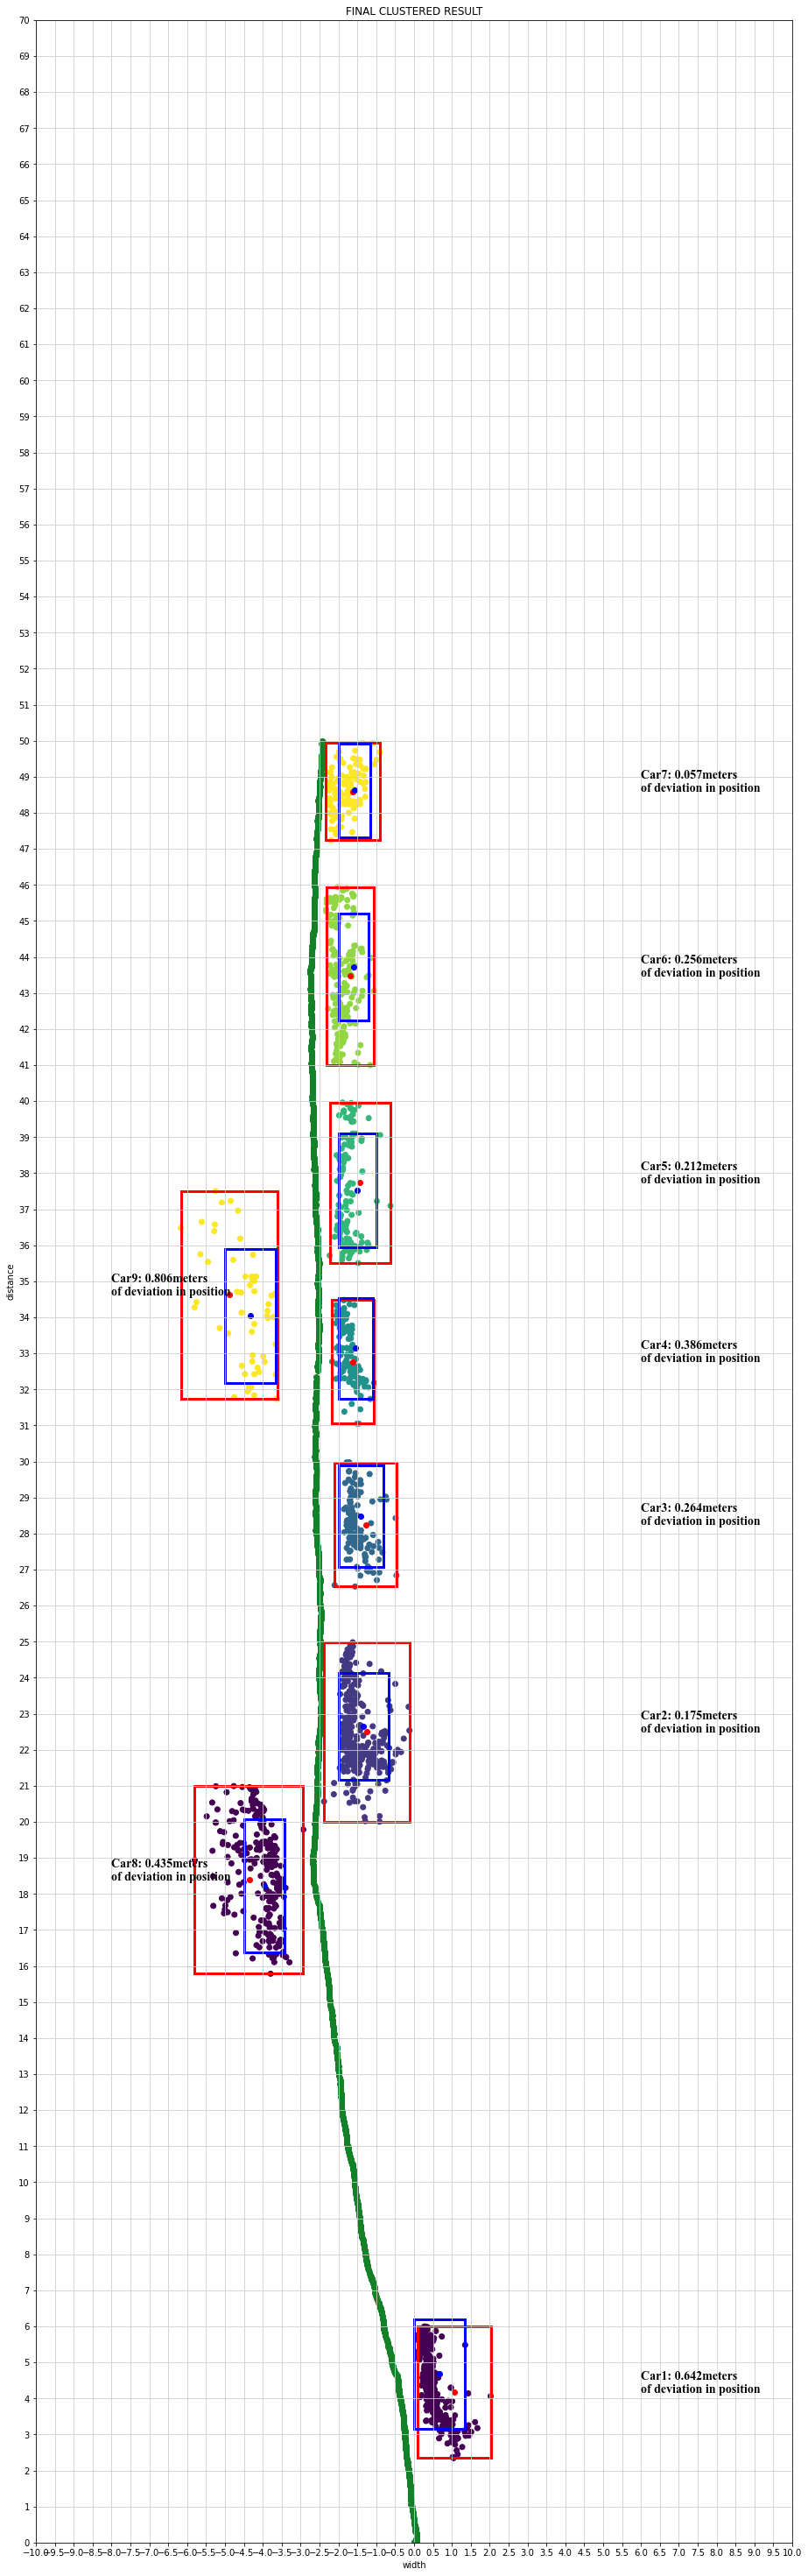

In [619]:
#Plotting data. Each cluster has different color.
cars = 0

font = {'family': 'times new roman',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }

fig = plt.figure()

ax = fig.add_axes([.1, .1, 2, 10])

ax.scatter(cluster_pos[1], cluster_pos[2], c=colors_cluster_pos)   #right side clusters
ax.scatter(cluster_neg[1], cluster_neg[2], c=colors_cluster)       #left side clusters
ax.scatter(trajectory_x_plot,  trajectory_y_plot, c='#128128')     #trajectory

#detected bounding boxes for positive points
for a in range(length1):
    cars = cars + 1
    rect = patches.Rectangle((xp[a], yp[a]), wp[a], hp[a], linewidth=3, edgecolor='r', facecolor='none')  #bounding box
    ax.add_patch(rect)
    ax.scatter(xp_c[a], yp_c[a], c='red')       #center point
    strr = "Car"+ str(cars) + ": " + str(error_c[cars-1]) + "meters \nof deviation in position"
    plt.text(6.0, yp_c[a], strr, fontdict = font)   #car number
    
#detected bounding boxes for negative points    
for a in range(length2):
    cars = cars + 1
    rect = patches.Rectangle((xn[a], yn[a]), wn[a], hn[a], linewidth=3, edgecolor='r', facecolor='none')  #bounding box
    ax.add_patch(rect)
    ax.scatter(xn_c[a], yn_c[a], c='red')       #center point
    strr = "Car"+ str(cars) + ": " + str(error_c[cars-1]) + "meters \nof deviation in position"
    plt.text(-8.0, yn_c[a], strr, fontdict = font)   #car number
    
#ground truth bounding boxes for all points
for a in range(len(real_x_value)):    
    rect = patches.Rectangle((real_x_value[a], real_y_value[a]), real_w_value[a], real_h_value[a], linewidth=3, edgecolor='blue', facecolor='none')
    ax.add_patch(rect)     
    ax.scatter(float(raw_x_value[a]), float(raw_y_value[a]), c='blue')
    
ax.set_facecolor("white")
plt.title('FINAL CLUSTERED RESULT')
plt.grid(which='major', color='#cccccc', alpha=1)
plt.xlim([-10, 10])
plt.xticks([10.0, 9.5, 9.0, 8.5, 8.0, 7.5, 7.0, 6.5, 6.0, 5.5, 5.0, 4.5, 4.0, 3.5, 3.0, 2.5, 2.0, 1.5, 1.0, 0.5, 0.0, -0.5, 
            -1.0, -1.5, -2.0, -2.5, -3.0, -3.5, -4.0, -4.5, -5.0, -5.5, -6.0, -6.5, -7.0, -7.5, -8.0, -8.5, -9.0, -9.5, -10.0])
plt.xlabel('width')
plt.ylim([0, 70])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,
           41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70])
plt.ylabel('distance')
plt.show()